In [138]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_and_ride_df = pd.merge(city_df, ride_df, on="city", how="left")

# Display the data table for preview
city_and_ride_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [139]:
#-----------------------  Bubble Plot of Ride Sharing Data  ---------------------------------

# Scatter plot requires the following:
# 1. x-axis = total number of rides for each city type
# 2. y-axis = average fare for each city type
# 3. buble size = drivers for each city type

In [140]:
# build the dataframe of each city type
urban_cities_df    = city_and_ride_df[city_and_ride_df["type"] == "Urban"]
subarban_cities_df = city_and_ride_df[city_and_ride_df["type"] == "Suburban"]
rural_cities_df    = city_and_ride_df[city_and_ride_df["type"] == "Rural"]

# 1. x-axis = total number of rides for each city type
urban_count    = urban_cities_df.groupby(["city"]).count()["ride_id"]
subarban_count = subarban_cities_df.groupby(["city"]).count()["ride_id"]
rural_count    = rural_cities_df.groupby(["city"]).count()["ride_id"]

# 2. y-axis = average fare for each city type
urban_avg_fare    = urban_cities_df.groupby(["city"]).mean()["fare"]
subarban_avg_fare = subarban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare    = rural_cities_df.groupby(["city"]).mean()["fare"]

# 3. buble size = avregae number of drivers for each city type, urban, subarban and rural
urban_driver_count    = urban_cities_df.groupby(["city"]).mean()["driver_count"]
subarban_driver_count = subarban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count    = rural_cities_df.groupby(["city"]).mean()["driver_count"]

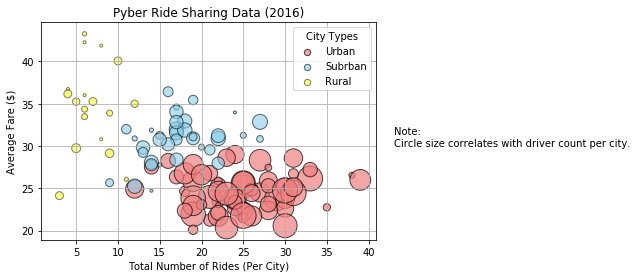

In [141]:
# scatter plot for each city type
plt.scatter(urban_count, urban_avg_fare, s=9*urban_driver_count, edgecolors="black",
            marker="o", alpha=0.7, label="Urban" , facecolors="lightcoral")

plt.scatter(subarban_count, subarban_avg_fare, s=9*subarban_driver_count, edgecolors="black",
           marker="o", alpha=0.6, label="Subrban" , facecolors="skyblue")

plt.scatter(rural_count, rural_avg_fare, s=9*rural_driver_count, edgecolors="black",
            marker="o", alpha=0.5, label="Rural" , facecolors="yellow")

# cosmatic stuff
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

legend = plt.legend( scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

plt.text(43, 30, 'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("total_number_of_rides_for_city_type_scatter.png")
plt.show()

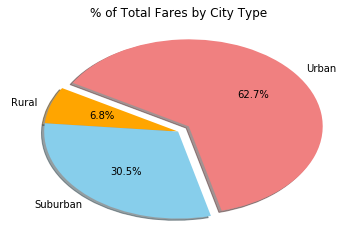

In [142]:
#------------------- Total Fares by City Type ------------------------------------------

# calculate total fares for each city type
fares_for_city_type_df = city_and_ride_df.groupby("type")["fare"].sum().reset_index()

# Build Pie Chart
colors=("orange","skyblue","lightcoral")
plt.pie(fares_for_city_type_df["fare"], labels = fares_for_city_type_df["type"], shadow = True, 
                    explode = (0,0,0.1), colors=colors,startangle=150, autopct = "%1.1f%%")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fare_percentage_by_city_type_piechart.png")
plt.show()

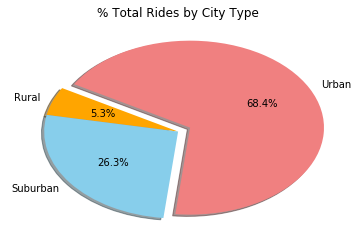

In [143]:
#-------------------------  Total Rides by City Type -------------------------

# Calculate total number of rides for each city type

rides_by_city_type_df = city_and_ride_df.groupby("type")["ride_id"].count().reset_index()

# Build Pie Chart
colors=("orange","skyblue","lightcoral")
plt.pie(rides_by_city_type_df["ride_id"], labels = rides_by_city_type_df["type"], shadow = True, 
                    explode = (0,0,0.1), colors=colors, startangle=150, autopct = "%1.1f%%")

plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_by_city_type_piechart.png")
plt.show()

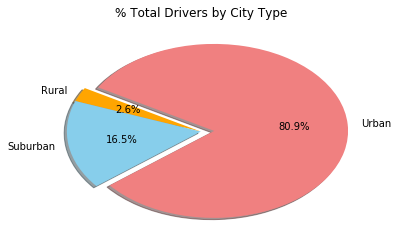

In [144]:
#---------------------- Total Drivers by City Type ----------------------------------

# get the driver count by city type
urban_drivers_df    = city_df[city_df["type"] == "Urban"]
subarban_drivers_df = city_df[city_df["type"] == "Suburban"]
rural_drivers_df    = city_df[city_df["type"] == "Rural"]

urban_drivers_count    = urban_drivers_df['driver_count'].sum()
subarban_drivers_count = subarban_drivers_df['driver_count'].sum()
rural_drivers_count    = rural_drivers_df['driver_count'].sum()

# build the list of driver totals for pie plot
drivers_count_list = [rural_drivers_count, subarban_drivers_count, urban_drivers_count]

# Build Pie Chart
colors=("orange","skyblue","lightcoral")
plt.pie(drivers_count_list, labels = drivers_by_city_type_df["type"], 
        shadow = True, explode = (0,0,0.1), colors=colors, startangle=150, autopct = "%1.1f%%")

plt.title("% Total Drivers by City Type")

#Save Figure
plt.savefig("total_drivers_by_city_type_piechart.png")
plt.show()

In [145]:
get_ipython().system('jupyter nbconvert --to script Pyber.ipynb')

[NbConvertApp] Converting notebook Pyber.ipynb to script
[NbConvertApp] Writing 5378 bytes to Pyber.py
